# <center>**Chapter 9 : Introduction to artifical nerural networks**</center>

**ANN's are the very core of machine learning of deep learning. They are versatile , powerful and scalable making them ideal to tackle large and highly complex machine learning tasks.**



## **The perceptron**

- **The perceptron is one of the simplest ANN architerctures.It is bases on threshold logic unit (TLU), or sometimes a linear threshold unit (LTU).**

- **The inputs and outputs are numbers and each input connection is associated with a weight. The TLU first computes a linear function of its input z.**

- **A perceptron is composed of one or more TLUs organized in a single layer , where every TLU is connected to every input. Such a layer is called a fully collected layer.**

- **Perceptrons are incapable of learning complex patterns**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)" , "petal width (cm)"]].values
y = (iris.target == 0)

In [3]:
per_clf = Perceptron(random_state= 42)
per_clf.fit(X,y)
X_new = [[2 , 0.5] , [3 , 1]]
y_pred = per_clf.predict(X_new)

## **Building and training MLPs with sklearn**

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [5]:
housing = fetch_california_housing()
X_train , X_test , y_train , y_test = train_test_split(housing.data , housing.target , random_state=42)

In [6]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50 , 50 , 50], early_stopping = True , verbose = True , random_state=42)

In [7]:
pipeline = make_pipeline(StandardScaler() , mlp_reg)
pipeline.fit(X_train , y_train)

Iteration 1, loss = 0.85190332
Validation score: 0.534299
Iteration 2, loss = 0.28288639
Validation score: 0.651094
Iteration 3, loss = 0.22884372
Validation score: 0.699782
Iteration 4, loss = 0.20746145
Validation score: 0.720468
Iteration 5, loss = 0.19649383
Validation score: 0.724839
Iteration 6, loss = 0.18928708
Validation score: 0.740084
Iteration 7, loss = 0.18132029
Validation score: 0.747406
Iteration 8, loss = 0.17556450
Validation score: 0.753945
Iteration 9, loss = 0.17190651
Validation score: 0.760500
Iteration 10, loss = 0.16687650
Validation score: 0.759213
Iteration 11, loss = 0.16329479
Validation score: 0.761907
Iteration 12, loss = 0.16054473
Validation score: 0.768950
Iteration 13, loss = 0.15690181
Validation score: 0.762699
Iteration 14, loss = 0.15630644
Validation score: 0.766003
Iteration 15, loss = 0.15712517
Validation score: 0.778464
Iteration 16, loss = 0.15155981
Validation score: 0.774237
Iteration 17, loss = 0.14957641
Validation score: 0.778361
Iterat

,steps,"[('standardscaler', ...), ('mlpregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,hidden_layer_sizes,"[50, 50, ...]"
,activation,'relu'
,solver,'adam'


In [8]:
mlp_reg.best_validation_score_

0.791536125425778

In [9]:
y_pred = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test , y_pred)
print(rmse)

0.5327699946812925


**Thi MLP doesnot contain any activation function for the output layer so its free to output any values it wants**


In [10]:
from sklearn.datasets import fetch_openml

fashion_mnist = fetch_openml(name = "Fashion-MNIST" , as_frame=False)
targets = fashion_mnist.target.astype(int)

In [11]:
X_train , y_train = fashion_mnist.data[:60000] , targets[:60000]
X_test , y_test = fashion_mnist.data[60000:] , targets[60000:]

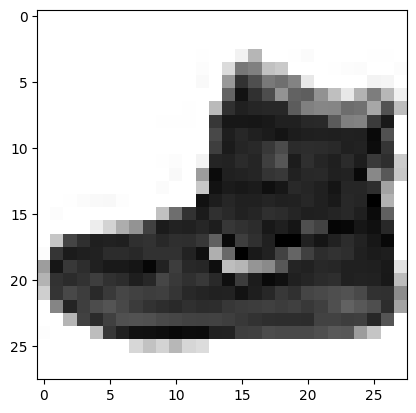

In [12]:
import matplotlib.pyplot as plt
X_sample = X_train[0].reshape(28 , 28)
plt.imshow(X_sample , cmap = "binary")
plt.show()

In [13]:
class_names = ["Tshirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" ,"Sneaker" , "Bag" , "Ankle boot"]  

In [14]:
class_names[y_train[0]]

'Ankle boot'

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

mlp_clf = MLPClassifier(hidden_layer_sizes= [300 , 100] , verbose = True , early_stopping=True , random_state=  42)
pipeline = make_pipeline(MinMaxScaler() , mlp_clf)
pipeline.fit(X_train , y_train)

Iteration 1, loss = 0.55394420
Validation score: 0.854833
Iteration 2, loss = 0.39017365
Validation score: 0.867500
Iteration 3, loss = 0.34572472
Validation score: 0.877500
Iteration 4, loss = 0.31541926
Validation score: 0.881167
Iteration 5, loss = 0.29351007
Validation score: 0.887167
Iteration 6, loss = 0.28459028
Validation score: 0.889167
Iteration 7, loss = 0.26775210
Validation score: 0.885500
Iteration 8, loss = 0.25610516
Validation score: 0.886667
Iteration 9, loss = 0.24488907
Validation score: 0.893167
Iteration 10, loss = 0.23915583
Validation score: 0.888500
Iteration 11, loss = 0.22290961
Validation score: 0.897167
Iteration 12, loss = 0.21925185
Validation score: 0.889667
Iteration 13, loss = 0.21249406
Validation score: 0.892167
Iteration 14, loss = 0.20374069
Validation score: 0.891333
Iteration 15, loss = 0.19557455
Validation score: 0.893833
Iteration 16, loss = 0.19099949
Validation score: 0.893667
Iteration 17, loss = 0.18445775
Validation score: 0.890333
Iterat

,steps,"[('minmaxscaler', ...), ('mlpclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,feature_range,"(0, ...)"
,copy,True
,clip,False
,hidden_layer_sizes,"[300, 100]"
,activation,'relu'
,solver,'adam'
,alpha,0.0001


In [16]:
accuracy = pipeline.score(X_test , y_test)
accuracy

0.8929

In [17]:
X_new = X_test[:15]
mlp_clf.predict(X_new)

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4])

In [18]:
y_proba = mlp_clf.predict_proba(X_new)
y_proba[12]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## **Hyperparameter Tuning Guidelines**
**the flexibility of neural networks is also one if their main drawbacks : there are many hyperparameters to tweak.**
- **Number of hidden layers**
- **NUmber of neurons per hidden layer**
- **Learning rate**
- **Batch Size**
- **Optimizer**
- **Activation Function**